In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("C:\\Users\\VINOD\\Downloads\\Customers.csv")
products = pd.read_csv("C:\\Users\\VINOD\\Downloads\\Products.csv")
transactions = pd.read_csv("C:\\Users\\VINOD\\Downloads\\Transactions.csv")



In [4]:
# Display the first few rows of each dataset
print("Customers Dataset:\n", customers.head())
print("\nProducts Dataset:\n", products.head())
print("\nTransactions Dataset:\n", transactions.head())



Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

In [5]:
# Check for missing values and data types in each dataset
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())



Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [6]:
# Handle missing values (if any)
print("\nChecking for missing values...")
print("Customers missing values:\n", customers.isnull().sum())
print("Products missing values:\n", products.isnull().sum())
print("Transactions missing values:\n", transactions.isnull().sum())




Checking for missing values...
Customers missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products missing values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Convert necessary columns to datetime (e.g., SignupDate, TransactionDate)
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")
print("\nMerged Dataset:\n", merged_data.head())




Merged Dataset:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth S

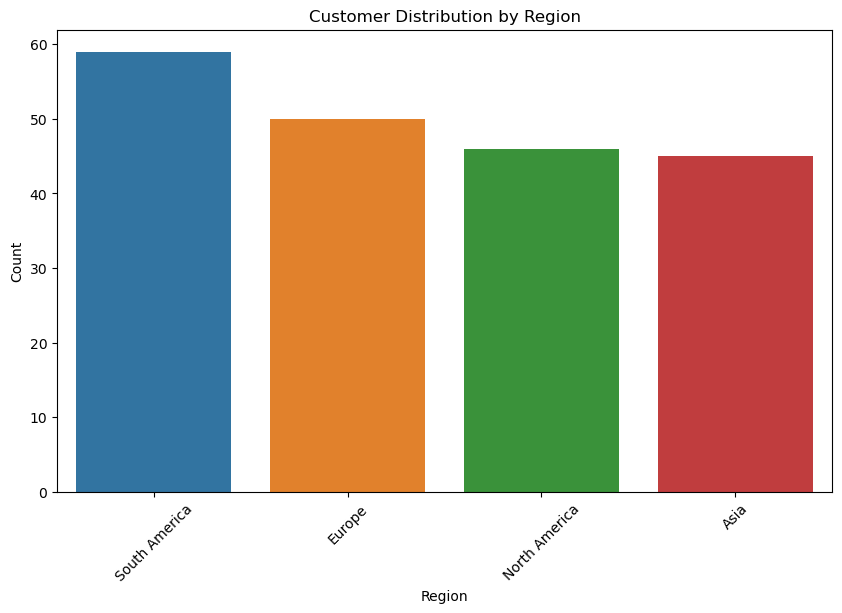

In [8]:
# --- EDA ---
# 1. Customer demographics analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



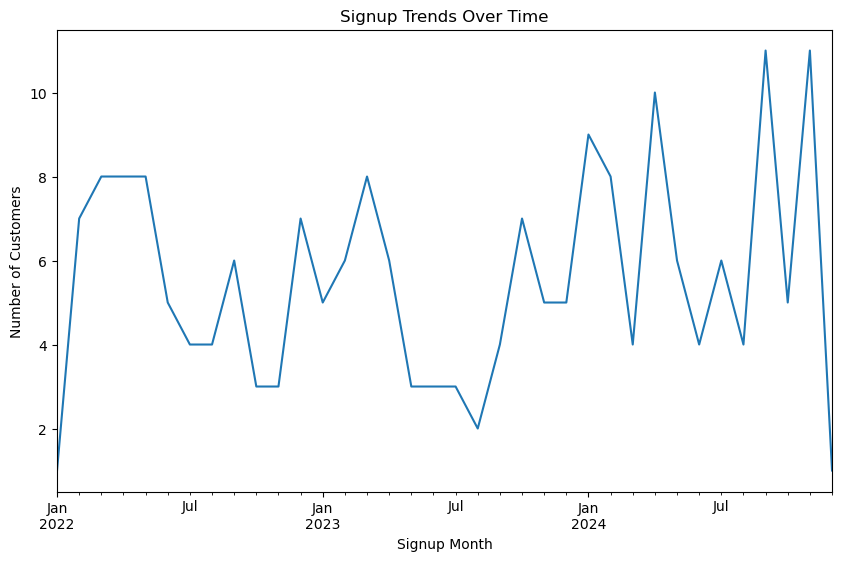

In [9]:
# 2. Signup trends over time
customers_by_date = customers.groupby(customers["SignupDate"].dt.to_period("M")).size()
customers_by_date.plot(kind="line", title="Signup Trends Over Time", figsize=(10, 6))
plt.xlabel("Signup Month")
plt.ylabel("Number of Customers")
plt.show()



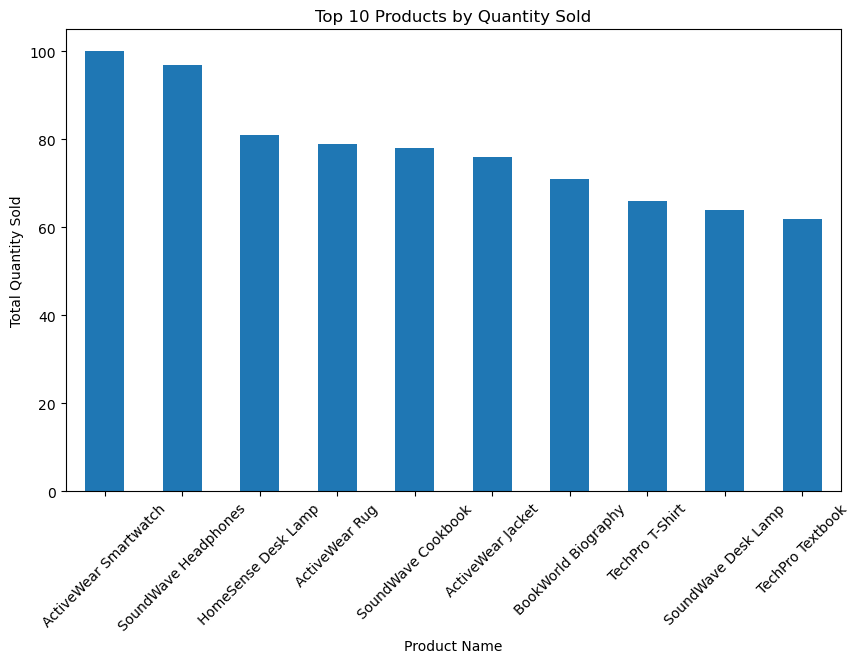

In [10]:
# 3. Popular products and categories
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", title="Top 10 Products by Quantity Sold", figsize=(10, 6))
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()



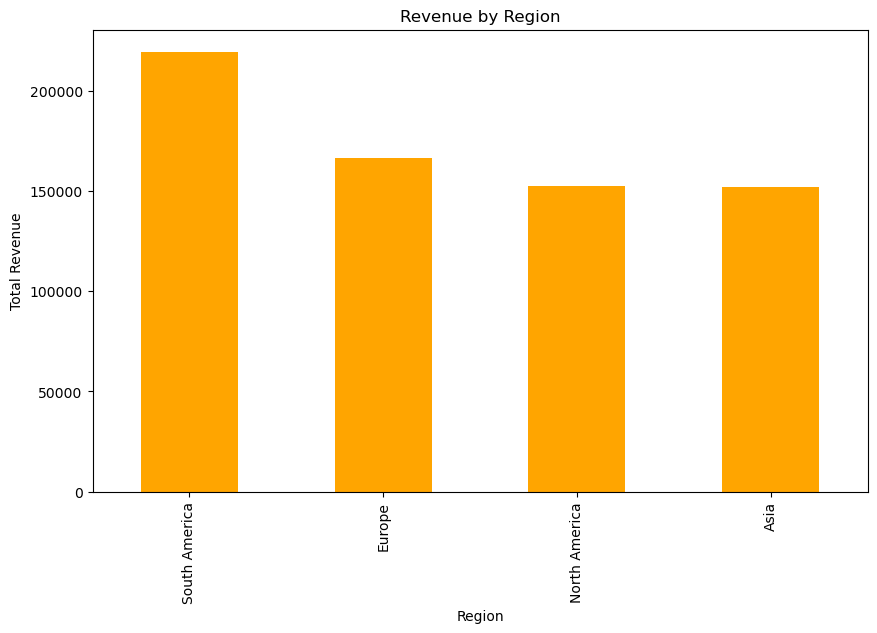

In [11]:
# 4. Revenue by region
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
revenue_by_region.plot(kind="bar", title="Revenue by Region", figsize=(10, 6), color="orange")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()



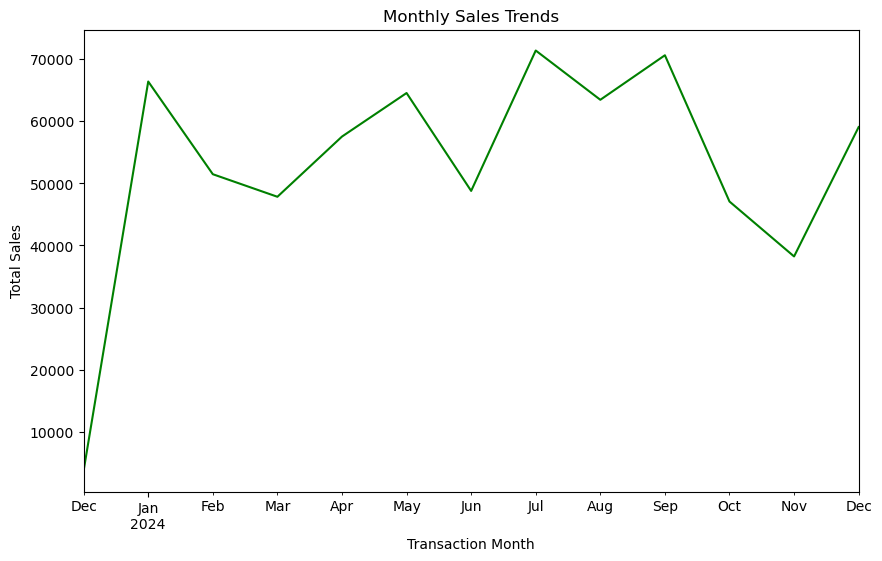

In [12]:
# 5. Monthly sales trends
sales_by_month = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
sales_by_month.plot(kind="line", title="Monthly Sales Trends", figsize=(10, 6), color="green")
plt.xlabel("Transaction Month")
plt.ylabel("Total Sales")
plt.show()



In [13]:
# Save the cleaned and merged dataset for further use
merged_data.to_csv("Merged_Dataset.csv", index=False)
print("\nEDA Completed. Cleaned and merged dataset saved as 'Merged_Dataset.csv'.")


EDA Completed. Cleaned and merged dataset saved as 'Merged_Dataset.csv'.


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


# Aggregate data to create customer profiles
customer_profiles = merged_data.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "Price_x": "mean",
    "Region": lambda x: x.mode()[0],
    "Category": lambda x: x.mode()[0]
}).reset_index()

# Encode categorical data (Region and Category)
encoded_data = pd.get_dummies(customer_profiles, columns=["Region", "Category"])

# Standardize numerical columns
scaler = StandardScaler()
num_cols = ["Quantity", "TotalValue", "Price_x"]
encoded_data[num_cols] = scaler.fit_transform(encoded_data[num_cols])

# Compute cosine similarity
similarity_matrix = cosine_similarity(encoded_data.drop(columns=["CustomerID"]))
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles["CustomerID"], columns=customer_profiles["CustomerID"])

# Function to find top 3 similar customers
def get_top_3_lookalikes(customer_id):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:4]
    return list(zip(similar_customers.index, similar_customers.values))

# Generate Lookalike.csv for the first 20 customers
lookalike_data = {}
for customer_id in customer_profiles["CustomerID"].head(20):
    lookalike_data[customer_id] = get_top_3_lookalikes(customer_id)

# Save results to CSV
lookalike_df = pd.DataFrame({
    "CustomerID": lookalike_data.keys(),
    "Lookalikes": [v for v in lookalike_data.values()]
})
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike model completed. Results saved in 'Lookalike.csv'.")

Lookalike model completed. Results saved in 'Lookalike.csv'.


In [21]:
lookalike=pd.read_csv("Lookalike.csv")

In [23]:
lookalike

,CustomerID,Lookalikes
0,C0001,"[('C0181', 0.9346517961588328), ('C0120', 0.89..."
1,C0002,"[('C0088', 0.9869774905277904), ('C0106', 0.90..."
2,C0003,"[('C0031', 0.8639478762562338), ('C0025', 0.86..."
3,C0004,"[('C0165', 0.9738080007914048), ('C0169', 0.92..."
4,C0005,"[('C0140', 0.9906947166711582), ('C0186', 0.98..."
5,C0006,"[('C0187', 0.9468086192488325), ('C0126', 0.94..."
6,C0007,"[('C0146', 0.9964960009625495), ('C0115', 0.96..."
7,C0008,"[('C0065', 0.8106787250085865), ('C0160', 0.78..."
8,C0009,"[('C0061', 0.9682324770160674), ('C0198', 0.94..."
9,C0010,"[('C0111', 0.9602659479910558), ('C0062', 0.88..."
